In [12]:
import pandas as pd
import geopandas as gpd
import pybdshadow

# Read building data
buildings = gpd.read_file(r'../example/data/bd_demo.json')
buildings = pybdshadow.bd_preprocess(buildings)

buildings = buildings[(buildings['x'] > 139.698311) &
                      (buildings['x'] < 139.699311) &
                      (buildings['y'] > 35.533816) &
                      (buildings['y'] < 35.534816)]

# Given UTC time
date = pd.to_datetime('2022-01-01 12:45:33.959797119')\
    .tz_localize('Asia/Tokyo')\
    .tz_convert('UTC')
date


Timestamp('2022-01-01 03:45:33.959797119+0000', tz='UTC')

In [17]:
from suncalc import get_times
sun_times = get_times(date, 139.699311, 35.533816)

In [20]:
sun_times['sunrise'],sun_times['sunset']


(Timestamp('2021-12-31 21:51:43.575562012'),
 Timestamp('2022-01-01 07:39:33.995478516'))

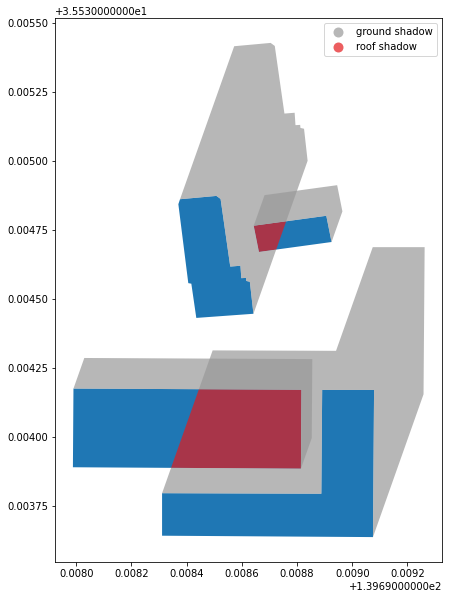

In [13]:

#Calculate shadows
shadows = pybdshadow.bdshadow_sunlight(buildings,date,roof=True,include_building = False)
shadows['type'] += ' shadow'

#Visualize buildings and shadows using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(1,(10,10))
ax = plt.subplot(111)


#建筑物
buildings.plot(ax = ax)

#地面阴影

shadows.plot(ax = ax,
            alpha = 0.7,
            column = 'type', 
            categorical=True, 
            cmap='Set1_r', 
            legend=True)

plt.show()